In [1]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import cosine
from gensim.models import Word2Vec

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [3]:
pd.options.display.max_rows = 1000

In [4]:
m1 = Word2Vec.load('../data/midwest.bin')

In [5]:
m2 = Word2Vec.load('../data/south.bin')

In [6]:
m1_vocab = set(m1.wv.vocab.keys())

In [7]:
m2_vocab = set(m2.wv.vocab.keys())

In [8]:
vocab = set.intersection(m1_vocab, m2_vocab)

In [9]:
vocab = sorted(vocab)

In [10]:
m1_m = np.stack([m1[t] for t in vocab])

In [11]:
m2_m = np.stack([m2[t] for t in vocab])

In [12]:
basevecs = m1_m - m1_m.mean(0)

In [13]:
othervecs = m2_m - m2_m.mean(0)

In [14]:
m = othervecs.T.dot(basevecs)

In [15]:
u, _, v = np.linalg.svd(m)

In [16]:
ortho = u.dot(v)

In [17]:
m2f = othervecs.dot(ortho)

In [18]:
data = []
for i, token in enumerate(vocab):
    c = m1.wv.vocab[token].count + m2.wv.vocab[token].count
    d = cosine(m1_m[i], m2f[i])
    data.append((token, c, d))

In [19]:
df = pd.DataFrame(data, columns=('token', 'count', 'distance'))

In [20]:
len(df[df['count'] > 1e4])

11431

In [22]:
df[df['count'] > 1e5].sort_values('distance', ascending=False).head(200)

,token,count,distance
23194,unkn,106578,0.753337
13034,il,160257,0.531475
24031,wi,100307,0.471217
5428,austin,135718,0.440884
15559,mi,304665,0.434995
15767,mo,218957,0.430351
11467,ga,178169,0.419095
19805,san,143838,0.413669
8369,cp,114073,0.403123
23002,tx,322392,0.386986


In [29]:
def compare(token):
    for t, _ in m1.most_similar(token, topn=50):
        print(t)
    print('\n')
    for t, _ in m2.most_similar(token, topn=50):
        print(t)

In [31]:
compare('planet')

earth
continent
world
country
species
nation
brink
worlds
universe
civilization
oceans
planets
generation
rarest
parasite
environment
creature
humans
phenomenon
lizard
realm
righ
society
verge
myth
colony
relies
moth
humanity
dimension
human
mission
creatures
#parisagreement
depths
lives
treadmill
axis
democracy
dwarf
ecosystem
extinction
cob
basis
globe
wrjr
notion
documentary
soil
internet


earth
world
continent
nation
country
worl
worlds
earths
brink
species
verge
universe
civilization
airwaves
rarest
realm
#earth
generation
society
humanity
creature
environment
righ
rainforest
oceans
human
planets
whim
soil
internet
@thunderclapit
humans
ecosystem
notion
antichrist
sidewalk
#heavymetal
axis
mission
parasites
creatures
republic
countrys
object
premise
mankind
x108
extinction
beaches
pyramids


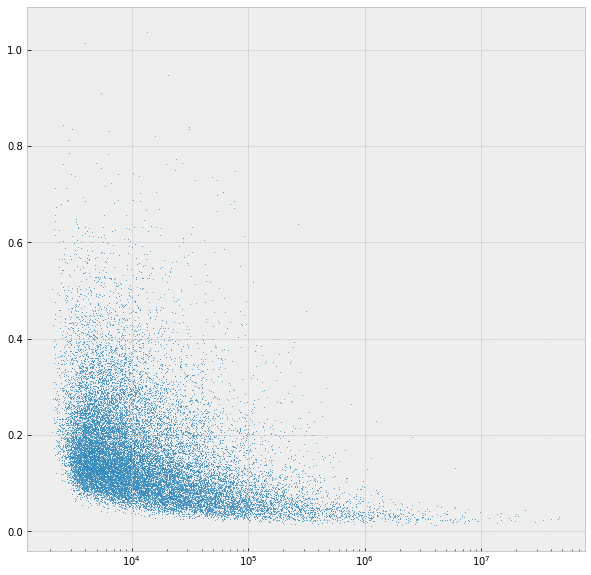

In [63]:
plt.figure(figsize=(10, 10))
plt.xscale('log')
plt.scatter(df['count'], df['distance'], s=0.2)